In [1]:
from fcgb.cfg.precompiled import get_llm, get_checkpointer
from fcgb.tools.spectools import PhantomResearcherSpecTool, JobHandlerSpecTool, JobHandler
from fcgb.cfg.chat_inputs_spec import JobHanlderConfig

## Fake LLM

In [2]:
fake_llm = get_llm(llm_model='fake')
memory = get_checkpointer(checkpointer_mode='local', mode='test')

In [3]:
tool_containers = [
    PhantomResearcherSpecTool(llm=fake_llm, memory=memory)
]

In [4]:
job_handler = JobHandlerSpecTool(
    llm=fake_llm,
    tool_containers=tool_containers,
    memory=memory,
)

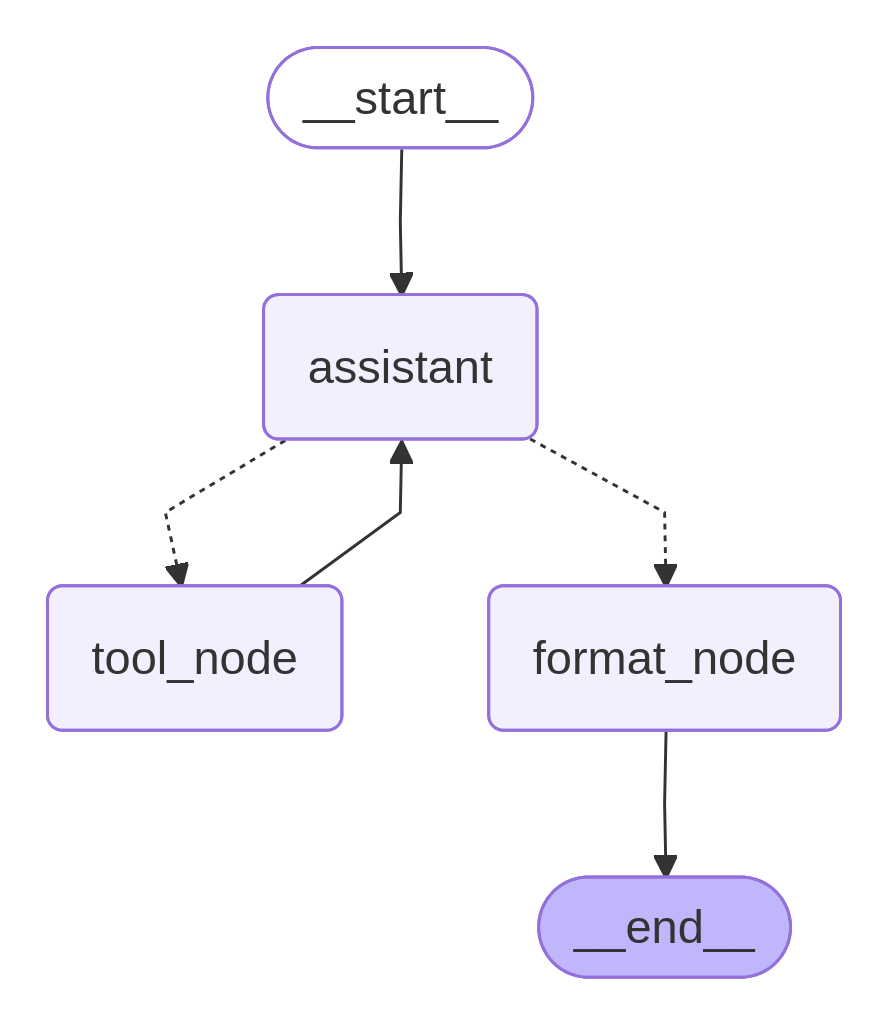

In [5]:
job_handler.display_graph()

In [5]:
outputs = job_handler.run(job_description='some job description')
print(outputs)

{'thread_id': '3e132091992a4d38af5ab16923d05857', 'output': 'Fake LLM response 2'}


In [6]:
job_state = job_handler.get_state(thread_id=outputs['thread_id'])

In [7]:
job_state

{'job_description': 'some job description',
 'turns': 2,
 'messages': [SystemMessage(content='Your purpose is to conduct a single job that will be provided to you by the user.\nYou are also equipped with a set of tools that you can use to complete the job.\n\nPut attention on the job description as well as output format if specified.\nYou have maximum of 4 turns to call the tools and complete the job.\nYou can call the same tool multiple times (even within single turn) with different parameters to solve the job.\nIf you will exceed the maximum number of turns, tools will be disabled and you will have to answer with the information you have at that moment.', additional_kwargs={}, response_metadata={}, id='350022a1-bcaa-4180-a285-ebbcc6d2540d'),
  HumanMessage(content='Process the following job:\n\nsome job description\n\nBe aware of provided restrictions and output format.\nStick to the job description and do not provide any additional information or context.\nIf there is any additional

In [8]:
for msg in job_state['messages']:
    msg.pretty_print()

================================ System Message ================================

Your purpose is to conduct a single job that will be provided to you by the user.
You are also equipped with a set of tools that you can use to complete the job.

Put attention on the job description as well as output format if specified.
You have maximum of 4 turns to call the tools and complete the job.
You can call the same tool multiple times (even within single turn) with different parameters to solve the job.
If you will exceed the maximum number of turns, tools will be disabled and you will have to answer with the information you have at that moment.
================================ Human Message =================================

Process the following job:

some job description

Be aware of provided restrictions and output format.
Stick to the job description and do not provide any additional information or context.
If there is any additional data provided use it for your answer. You can also pass

In [9]:
for tool_thread in job_state['tools_threads']:
    tool_state = job_handler.get_state(thread_id=tool_thread)
    print(tool_state)
    print('-'*50)

{'job': 'Fake string xcror', 'restrictions': 'Fake string fdppx', 'output_format': 'Fake string axtqd', 'data': 'Fake string rrsgl', 'messages': [SystemMessage(content='Your purpose is to mimic a research tool that uses external resources like web pages, research papers, wikipedia etc. to answer questions and provide information.\nIf you will be asked to use those external resources use your best knowledge to provide the most accurate and relevant information whitout using any external resources but within your answer you can pretend that you are using them.\n\nYou are a part of a testing tool so accuracy is not that important but try to be as accurate as possible.\n\nAvoid any unnecessary comments that are not a integral part of the answer.\n\n', additional_kwargs={}, response_metadata={}, id='bbc613d3-6cfc-47a4-b3bb-12a7c611c064'), HumanMessage(content="Provide an answer for a research job which is:\n**research job**: Fake string xcror\n\nWhen writing your answer be aware of provided

In [10]:
tool_thread = job_state['tools_threads'][0]
tool_state = job_handler.get_state(thread_id=tool_thread)
for msg in tool_state['messages']:
    msg.pretty_print()

================================ System Message ================================

Your purpose is to mimic a research tool that uses external resources like web pages, research papers, wikipedia etc. to answer questions and provide information.
If you will be asked to use those external resources use your best knowledge to provide the most accurate and relevant information whitout using any external resources but within your answer you can pretend that you are using them.

You are a part of a testing tool so accuracy is not that important but try to be as accurate as possible.

Avoid any unnecessary comments that are not a integral part of the answer.


================================ Human Message =================================

Provide an answer for a research job which is:
**research job**: Fake string xcror

When writing your answer be aware of provided restrictions:
**restrictions**: Fake string fdppx

There is also specified output format of your answer:
**output format**: Fa

In [27]:
fake_tooled_llm = fake_llm.bind_tools([container.get_tool() for container in tool_containers], parallel_tool_calls=False)

In [35]:
fake_tooled_llm().tool_calls

[]

## Real LLM

In [2]:
inputs = {
    'job_description': """
    job: Explore research papers to identify and list the most commonly cited and foundational Chain-of-Thought prompting variants
    restrictions: Focus on variants that are widely recognized and have substantial documentation or research backing them. Avoid niche or experimental variants that lack sufficient information. Also do not include fine-tuning methods or techniques that are not directly related to prompting.
    output_format: A list of variant names, each with a brief (1-2 sentence) description of its core idea.
    """
}

In [3]:
llm = get_llm(llm_model='google')
memory = get_checkpointer(checkpointer_mode='local', mode='test')

In [4]:
tool_containers = [
    PhantomResearcherSpecTool(llm=llm, memory=memory)
]

In [5]:
job_handler = JobHandler(
    llm=llm,
    tool_containers=tool_containers,
    initial_messages_spec=JobHanlderConfig.initial_messages_spec,
    internal_messages_spec=JobHanlderConfig.internal_messages_spec,
    memory=memory,
    init_values=JobHanlderConfig.init_values,
    prompt_manager_spec=JobHanlderConfig.prompt_manager_spec,
    global_inputs=JobHanlderConfig.global_inputs
)

In [6]:
outputs = job_handler.run(**inputs)
print(outputs)

{'thread_id': '5c97c752afcb4a2db15d68ada7e07d74', 'output': 'Foundational Chain-of-Thought Prompting Variants:\n\n*   **Standard Chain-of-Thought Prompting:** This involves providing a few example questions along with their step-by-step reasoning processes to guide the model in generating coherent and logical explanations for new, unseen questions. The core idea is to elicit reasoning traces from the model, improving its ability to solve complex tasks.\n\n*   **Zero-Shot Chain-of-Thought Prompting:** In this variant, instead of providing examples, the prompt simply includes the phrase "Let\'s think step by step." This surprisingly effective technique encourages the model to generate a chain of reasoning without any explicit demonstrations.\n\n*   **Self-Consistency with Chain-of-Thought Prompting:** This approach generates multiple independent reasoning paths for a single question using CoT prompting. The final answer is then selected by aggregating the answers from these different rea

In [7]:
job_state = job_handler.get_state(thread_id=outputs['thread_id'])

In [8]:
job_state

{'job_description': '\n    job: Explore research papers to identify and list the most commonly cited and foundational Chain-of-Thought prompting variants\n    restrictions: Focus on variants that are widely recognized and have substantial documentation or research backing them. Avoid niche or experimental variants that lack sufficient information. Also do not include fine-tuning methods or techniques that are not directly related to prompting.\n    output_format: A list of variant names, each with a brief (1-2 sentence) description of its core idea.\n    ',
 'turns': 2,
 'messages': [SystemMessage(content='Your purpose is to conduct a single job that will be provided to you by the user.\nYou are also equipped with a set of tools that you can use to complete the job.\n\nPut attention on the job description as well as output format if specified.\nYou have maximum of 4 turns to call the tools and complete the job.\nYou can call the same tool multiple times (even within single turn) with d

In [9]:
for msg in job_state['messages']:
    msg.pretty_print()

================================ System Message ================================

Your purpose is to conduct a single job that will be provided to you by the user.
You are also equipped with a set of tools that you can use to complete the job.

Put attention on the job description as well as output format if specified.
You have maximum of 4 turns to call the tools and complete the job.
You can call the same tool multiple times (even within single turn) with different parameters to solve the job.
If you will exceed the maximum number of turns, tools will be disabled and you will have to answer with the information you have at that moment.
================================ Human Message =================================

Process the following job:


    job: Explore research papers to identify and list the most commonly cited and foundational Chain-of-Thought prompting variants
    restrictions: Focus on variants that are widely recognized and have substantial documentation or research ba

In [10]:
for tool_thread in job_state['tools_threads']:
    tool_state = job_handler.get_state(thread_id=tool_thread)
    print(tool_state)
    print('-'*50)

{'job': 'Explore research papers to identify and list the most commonly cited and foundational Chain-of-Thought prompting variants', 'restrictions': 'Focus on variants that are widely recognized and have substantial documentation or research backing them. Avoid niche or experimental variants that lack sufficient information. Also do not include fine-tuning methods or techniques that are not directly related to prompting.', 'output_format': 'A list of variant names, each with a brief (1-2 sentence) description of its core idea.', 'data': '', 'messages': [SystemMessage(content='Your purpose is to mimic a research tool that uses external resources like web pages, research papers, wikipedia etc. to answer questions and provide information.\nIf you will be asked to use those external resources use your best knowledge to provide the most accurate and relevant information whitout using any external resources but within your answer you can pretend that you are using them.\n\nYou are a part of 